# Tarea de clusters 

## Descripcción
En este proyecto cada grupo ejecutara y evaluara distintos algoritmos de clustering sobre un set de datos dado. Para la evaluacion considere la calidad de los clusters en terminos de distancias intra-clusters e inter-clusters considerando parametros que requiera el algoritmo. Ademas evalue el tiempo de ejecucion de los clusters. Para su estudio considere los siguientes algoritmos de clustering.

* kmeans
* Minibatch kmeans
* Jerarquico aglomerativo ´
* DBSCAN o HDBSCAN
* Meanshift

## Datos
Para su evaluacion considere el conjunto de puntos 3D entregados ante riormente en el curso (test21 pts 1.txt).

## Evaluacion de clusters 

Para evaluar los algoritmos de clustering considere la distancia maxima entre cualquier par de puntos para cada cluster y dibuje el CDF con numero de clusters con distancia maximas. Para la distancia inter-cluster compute las distancias mınima entre distintos clusters y construya el CDF con estas distancias para todos los clusters. Para esta medida considere los centroides de los clusters. Ademas proporcione graficos que muestren una comparacion en tiempo de ejecucion para cada algoritmo dependiendo de sus parametros y la comparacion entre distintos algoritmos. Para esto ultimo considere que fija de alguna manera lo que cree es una buena solucion al problema. 




# Librerias

In [4]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.cluster
import matplotlib.pyplot as plt
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
import scipy
from scipy.spatial import distance
import time

# Lectura de Datos

In [5]:
archivo=pd.read_csv('test21_pts_1.txt', header=None, delim_whitespace=True)
tamaño_archivo=len(archivo)

In [6]:
data=[]
for i in range (tamaño_archivo):
    data.append(archivo.iloc[i])    

In [7]:
data = np.asarray(data)
data=data.reshape(tamaño_archivo,3)

In [8]:
print(data)
print(len(data))

[[119.279  70.17   20.23 ]
 [115.553  73.036  17.536]
 [116.126  73.648  17.471]
 ...
 [112.595 105.922  78.315]
 [109.662 157.261 102.544]
 [110.766 140.324 116.952]]
258382


# K-means

In [15]:
k_means = sklearn.cluster.KMeans(10)
clusters_kmeans=k_means.fit(data)
lebels_cluster_kmeans=clusters_kmeans.labels_
n_clusters_kmeans = lebels_cluster_kmeans.max()+1
cluster_centers_kmeans = clusters_kmeans.cluster_centers_

In [39]:
alldistances = k_means.inertia_ 

In [127]:
print(cluster_centers_kmeans)
dist=scipy.spatial.distance.cdist(cluster_centers_kmeans,cluster_centers_kmeans)
minval = np.min(dist[np.nonzero(dist)])
print("valor minirmo= ",minval)
print(dist)

[[131.79763658  45.99526647  67.2738867 ]
 [129.54529461 123.99659075  16.39082745]
 [116.91176301 118.18049871  90.43600345]
 [151.35020714 153.04856627  29.40314817]
 [124.88312016  79.73474537  29.97907923]
 [121.38548036 176.86845183  83.11974527]
 [129.19116158 183.15691515  49.06927207]
 [159.31375876  95.6313414   53.39129404]
 [150.6815389   99.42894015  95.93533095]
 [158.15553125 148.9640281   76.34960967]]
valor minirmo=  35.49518496614389
[[  0.          93.15774445  77.25788398 115.22545227  50.76480708
  132.23953599 138.38901537  58.42604978  63.50777619 106.67555123]
 [ 93.15774445   0.          75.34003674  38.58486727  46.53479787
   85.5263979   67.58661211  55.31530851  85.89317968  70.97164316]
 [ 77.25788398  75.34003674   0.          78.27386532  72.08785037
   59.31119306  77.99951787  60.65232258  39.01616736  53.35822888]
 [115.22545227  38.58486727  78.27386532   0.          77.94712775
   65.96017438  42.24088543  62.73425706  85.45199101  47.61266781]
 [ 50

In [124]:
max_element=np.amax(dist)
print(max_element)
for d in range (len(dist)):
    for e in range (len(dist)):
        if dist[d][e]==0:
            dist[d][e]=max_element+1000
print(dist)            
min_element=np.amin(dist)     
print(min_element)

1138.3890153671248
[[1138.38901537   93.15774445   77.25788398  115.22545227   50.76480708
   132.23953599  138.38901537   58.42604978   63.50777619  106.67555123]
 [  93.15774445 1138.38901537   75.34003674   38.58486727   46.53479787
    85.5263979    67.58661211   55.31530851   85.89317968   70.97164316]
 [  77.25788398   75.34003674 1138.38901537   78.27386532   72.08785037
    59.31119306   77.99951787   60.65232258   39.01616736   53.35822888]
 [ 115.22545227   38.58486727   78.27386532 1138.38901537   77.94712775
    65.96017438   42.24088543   62.73425706   85.45199101   47.61266781]
 [  50.76480708   46.53479787   72.08785037   77.94712775 1138.38901537
   110.77509108  105.25749325   44.56795308   73.50950183   89.72164187]
 [ 132.23953599   85.5263979    59.31119306   65.96017438  110.77509108
  1138.38901537   35.49518497   94.4552975    83.78171788   46.65327687]
 [ 138.38901537   67.58661211   77.99951787   42.24088543  105.25749325
    35.49518497 1138.38901537   92.6648

## Distncia de cada punto al centro del cluster

In [81]:
def k_mean_distance(data, cx, cy, cz, i_centroid, cluster_labels):
        distances = [np.sqrt((x-cx)**2+(y-cy)**2+(z-cz)**2) for (x, y, z) in data[cluster_labels == i_centroid]]
        return distances

distances = []
suma=0
for i, (cx, cy,cz) in enumerate(cluster_centers_kmeans):
    mean_distance = k_mean_distance(data, cx, cy, cz, i, lebels_cluster_kmeans)
    mean_distance=np.asarray(mean_distance)
    distances.append(mean_distance)

# Distancia de un punto a cualquier otro de cada cluster

In [60]:
puntos_cluster={}
for a in range(n_clusters_kmeans):
    puntos_cluster[a]=list(data[i] for i in range(len(data)) if lebels_cluster_kmeans[i]==a )

In [80]:
distancia_max_por_cluster=[]
for i in range(n_clusters_kmeans):
    dist=scipy.spatial.distance.cdist(puntos_cluster[i],puntos_cluster[i])
    distancia_max_por_cluster.append(np.amax(dist))
print(distancia_max_por_cluster)    

[69.06242968503207, 73.08495364984506, 98.636099613681, 73.66105718763478, 68.07493381561233, 96.34830814290409, 73.4697543823307, 71.07665746220766, 72.86590364498336, 76.17420436735785]


In [82]:
max(distancia_max_por_cluster)

98.636099613681

# Obtencion de Datos de una sola corrida K-means

In [ ]:
size_clusters=[150,200,300]
distancia_puntos_kmeans=[]
Tiempos_creacion_cluster=[]
distancia_centroides_kmeans=[]
for c in range(len(size_clusters)):
    tamano_cluster=size_clusters[c]
    #Genreo el cluster
    start=time.time()
    k_means = sklearn.cluster.KMeans(tamano_cluster)
    clusters_kmeans=k_means.fit(data)
    end=time.time()
    fin=end-start
    
    #Datos utiles del cluster
    lebels_cluster_kmeans=clusters_kmeans.labels_
    n_clusters_kmeans = lebels_cluster_kmeans.max()+1
    cluster_centers_kmeans = clusters_kmeans.cluster_centers_

    #Saco la distancia entre puntos
    puntos_cluster={}
    for a in range(n_clusters_kmeans):
        puntos_cluster[a]=list(data[i] for i in range(len(data)) if lebels_cluster_kmeans[i]==a )
   
    distancia_max_por_cluster=[]
    for i in range(n_clusters_kmeans):
        dist=scipy.spatial.distance.cdist(puntos_cluster[i],puntos_cluster[i])
        distancia_max_por_cluster.append(np.amax(dist))
        
    #Saco la distancia entre los centroides de los clusters
    dist_centroides=scipy.spatial.distance.cdist(cluster_centers_kmeans,cluster_centers_kmeans)
    min_element = np.min(dist_centroides[np.nonzero(dist_centroides)])
    
    #Almaceno la distancia minima de los centroides   
    distancia_centroides_kmeans.append(min_element)
    
    #Guardo la distancia maxima entre los puntos   
    distancia_puntos_kmeans.append(max(distancia_max_por_cluster))
    
    #Guardo el tiempo de ejecucion para la creacion del cluster
    Tiempos_creacion_cluster.append(fin)
    
    
    print("Termine iteracion ",c)
    
print (distancia_puntos_kmeans)
print(Tiempos_creacion_cluster)
print(distancia_centroides_kmeans)



## Gráfico 

NameError: name 'n_clusters_' is not defined

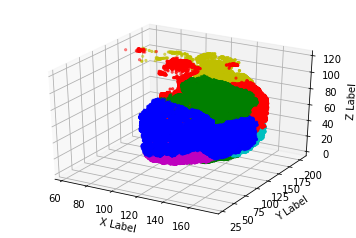

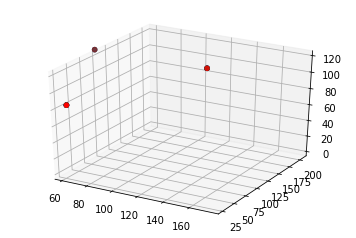

In [21]:
X=data
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
figc = plt.figure(2)
axc = figc.add_subplot(111, projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

labels1=lebels_cluster_kmeans

 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_kmeans), colors):
    my_members = labels1 == k
    cluster_center = cluster_centers_kmeans[k]
    ax.scatter(X[my_members, 0], X[my_members, 1], X[my_members, 2], c=col, marker='.')
    axc.scatter(cluster_centers_kmeans[0], cluster_centers_kmeans[1], cluster_centers_kmeans[2], c=col, marker='o')
axc.set_xlim(ax.get_xlim())
axc.set_ylim(ax.get_ylim())
axc.set_zlim(ax.get_zlim())    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# MiniBatch K-Means

In [ ]:
k_means_MiniBatchKMeans = sklearn.cluster.MiniBatchKMeans(100)
clusters_MiniBatchKMeans=k_means_MiniBatchKMeans.fit(data)
lebels_cluster_MiniBatchKMeans=clusters.labels_
n_clusters_MiniBatchKMeans = lebels_cluster.max()+1
cluster_centers_MiniBatchKMeans = clusters.cluster_centers_

In [89]:
size_clusters=[10,30,50,70,100,150,200,300]
distancia_puntos_kMiniBatchKMeans=[]
Tiempos_creacion_cluster=[]
distancia_centroides_kmeans=[]
for c in range(len(size_clusters)):
    tamano_cluster=size_clusters[c]
    #Genreo el cluster
    start=time.time()
    k_means_MiniBatchKMeans = sklearn.cluster.MiniBatchKMeans(tamano_cluster)
    clusters_MiniBatchKMeans=k_means_MiniBatchKMeans.fit(data)
    end=time.time()
    fin=end-start
    print("hola0")
    #Datos utiles del cluster
    lebels_cluster_MiniBatchKMeans=k_means_MiniBatchKMeans.labels_
    n_clusters_MiniBatchKMeans = lebels_cluster_MiniBatchKMeans.max()+1
    cluster_centers_MiniBatchKMeans = k_means_MiniBatchKMeans.cluster_centers_

    #Saco la distancia entre puntos
    puntos_cluster={}
    for a in range(n_clusters_MiniBatchKMeans):
        puntos_cluster[a]=list(data[i] for i in range(len(data)) if lebels_cluster_MiniBatchKMeans[i]==a )
    print("hola1")
    distancia_max_por_cluster=[]
    for i in range(n_clusters_MiniBatchKMeans):
        dist=scipy.spatial.distance.cdist(puntos_cluster[i],puntos_cluster[i])
        distancia_max_por_cluster.append(np.amax(dist))
    print("hola2")    
#     #Saco la distancia entre los centroides de los clusters
#     dist_centroides=scipy.spatial.distance.cdist(cluster_centers_MiniBatchKMeans,cluster_centers_MiniBatchKMeans)
#     min_element = np.min(dist_centroides[np.nonzero(dist_centroides)])
    
#     #Almaceno la distancia minima de los centroides   
#     distancia_centroides_kmeans.append(min_element)
    
    #Guardo la distancia maxima entre los puntos   
    distancia_puntos_kMiniBatchKMeans.append(max(distancia_max_por_cluster))
    
#     #Guardo el tiempo de ejecucion para la creacion del cluster
#     Tiempos_creacion_cluster.append(fin)
    
    print (distancia_puntos_kMiniBatchKMeans)
    print("Termine iteracion ",c)
    
print (distancia_puntos_kmeans)
# print(Tiempos_creacion_cluster)
# print(distancia_centroides_kmeans)


hola0
hola1
hola2
[101.19578262457385]
Termine iteracion  0
hola0
hola1
hola2
[101.19578262457385, 73.60812241865703]
Termine iteracion  1
hola0
hola1
hola2
[101.19578262457385, 73.60812241865703, 75.24417548222586]
Termine iteracion  2
hola0
hola1
hola2
[101.19578262457385, 73.60812241865703, 75.24417548222586, 76.780725367764]
Termine iteracion  3
hola0
hola1
hola2
[101.19578262457385, 73.60812241865703, 75.24417548222586, 76.780725367764, 60.471273882728816]
Termine iteracion  4
hola0
hola1
hola2
[101.19578262457385, 73.60812241865703, 75.24417548222586, 76.780725367764, 60.471273882728816, 58.98170648599446]
Termine iteracion  5
hola0
hola1
hola2
[101.19578262457385, 73.60812241865703, 75.24417548222586, 76.780725367764, 60.471273882728816, 58.98170648599446, 48.33011612855902]
Termine iteracion  6
hola0
hola1
hola2
[101.19578262457385, 73.60812241865703, 75.24417548222586, 76.780725367764, 60.471273882728816, 58.98170648599446, 48.33011612855902, 34.007882924404456]
Termine iterac

NameError: name 'distancia_puntos_kmeans' is not defined

# Jerarquico aglomerativo 

In [ ]:
tamaños_datos=[10000,15000,20000,25000,30000,35000,40000]
tiempos=[]
for i in range(tamaños_datos):
    start=time.time()
    AgglomerativeClustering = sklearn.cluster.AgglomerativeClustering(500)
    cluster_AgglomerativeClustering=AgglomerativeClustering.fit(data[0:tamaños_datos[i]])
    end=time.time()
    fin=end-start
    tiempos.append(fin)

In [85]:
data1=data[0:20000]
size_clusters=[10,30,50,70,100,150,200,300]
distancia_puntos_kMiniBatchKMeans=[]
Tiempos_creacion_cluster=[]
distancia_centroides_kmeans=[]
for c in range(len(size_clusters)):
    tamano_cluster=size_clusters[c]
    #Genreo el cluster
    start=time.time()
    AgglomerativeClustering = sklearn.cluster.AgglomerativeClustering(tamano_cluster)
    cluster_AgglomerativeClustering=AgglomerativeClustering.fit(data1)
    end=time.time()
    fin=end-start
    
    print("hola0")
    #Datos utiles del cluster
    lebels_cluster_AgglomerativeClustering=AgglomerativeClustering.labels_
    n_clusters_AgglomerativeClustering = lebels_cluster_AgglomerativeClustering.max()+1


    #diccionario puntos por cluster
    puntos_cluster={}
    for a in range(n_clusters_AgglomerativeClustering):
        puntos_cluster[a]=list(data1[i] for i in range(len(data1)) if lebels_cluster_AgglomerativeClustering[i]==a )
    print("hola1")
    
    distancia_max_por_cluster=[]
    for i in range(n_clusters_AgglomerativeClustering):
        dist=scipy.spatial.distance.cdist(puntos_cluster[i],puntos_cluster[i])
        distancia_max_por_cluster.append(np.amax(dist))
                            
#     #Genero los centroides
#     centro_cluster={}
#     for j in range(n_clusters_AgglomerativeClustering):
#         x=[]
#         y=[]
#         z=[]
#         for i in range(len(puntos_cluster[j])):
#             x.append(puntos_cluster[j][i][0])
#             y.append(puntos_cluster[j][i][1])
#             z.append(puntos_cluster[j][i][2])
#         centro_cluster[j]=[sum(x)/len(puntos_cluster[j]),sum(y)/len(puntos_cluster[j]),sum(z)/len(puntos_cluster[j])] 
    
#     cluster_centers_MiniBatchKMeans=list(centro_cluster.values())
        
#     #Saco la distancia entre los centroides de los clusters
#     dist_centroides=scipy.spatial.distance.cdist(cluster_centers_MiniBatchKMeans,cluster_centers_MiniBatchKMeans)
#     min_element = np.min(dist_centroides[np.nonzero(dist_centroides)])
#     print("hola2")
#     #Almaceno la distancia minima de los centroides   
#     distancia_centroides_kmeans.append(min_element)
    
    #Guardo la distancia maxima entre los puntos   
    distancia_puntos_kMiniBatchKMeans.append(max(distancia_max_por_cluster))
    
#     #Guardo el tiempo de ejecucion para la creacion del cluster
#     Tiempos_creacion_cluster.append(fin)
    
    print (distancia_puntos_kMiniBatchKMeans)
#     print(Tiempos_creacion_cluster)
#     print(distancia_centroides_kmeans)
    print("Termine iteracion ",c)
    
print (distancia_puntos_kMiniBatchKMeans)
# print(Tiempos_creacion_cluster)
# print(distancia_centroides_kmeans)


hola0
hola1
[76.5220236141204]
Termine iteracion  0
hola0
hola1
[76.5220236141204, 64.37310952563965]
Termine iteracion  1
hola0
hola1
[76.5220236141204, 64.37310952563965, 49.58459639847842]
Termine iteracion  2
hola0
hola1
[76.5220236141204, 64.37310952563965, 49.58459639847842, 49.58459639847842]
Termine iteracion  3
hola0
hola1
[76.5220236141204, 64.37310952563965, 49.58459639847842, 49.58459639847842, 40.33519408655423]
Termine iteracion  4
hola0
hola1
[76.5220236141204, 64.37310952563965, 49.58459639847842, 49.58459639847842, 40.33519408655423, 33.37680856522983]
Termine iteracion  5
hola0
hola1
[76.5220236141204, 64.37310952563965, 49.58459639847842, 49.58459639847842, 40.33519408655423, 33.37680856522983, 33.37680856522983]
Termine iteracion  6
hola0
hola1
[76.5220236141204, 64.37310952563965, 49.58459639847842, 49.58459639847842, 40.33519408655423, 33.37680856522983, 33.37680856522983, 22.78385432713263]
Termine iteracion  7
[76.5220236141204, 64.37310952563965, 49.58459639847

# DBSCAN

In [130]:
DBSCAN=sklearn.cluster.DBSCAN(eps=, min_samples=10)
cluster_DBSCAN=DBSCAN.fit(data)
lebels_cluster_DBSCAN=cluster_DBSCAN.labels_
n_clusters_DBSCAN = lebels_cluster_DBSCAN.max()+1
cluster_core_DBSCAN= cluster_DBSCAN.core_sample_indices_

In [133]:
size_clusters=[(0.5,10),(0.7,15),(0.9,17),(1,20),(1.5,15),(2,27)]
distancia_puntos_kMiniBatchKMeans=[]
Tiempos_creacion_cluster=[]
distancia_centroides_kmeans=[]
for c,d in size_clusters:
    epsilon=c
    min_puntos=d
    print(epsilon,min_puntos)

0.5 10
0.7 15
0.9 17
1 20
1.5 15
2 27


In [77]:
size_clusters=[(0.7,15),(0.9,17),(1,20),(1.5,15),(2,27)]
distancia_puntos_kMiniBatchKMeans=[]
Tiempos_creacion_cluster=[]
distancia_centroides_kmeans=[]

for c,d in size_clusters:
    epsilon=c
    min_puntos=d
    #Genreo el cluster
    start=time.time()
    DBSCAN=sklearn.cluster.DBSCAN(eps=epsilon, min_samples=min_puntos)
    cluster_DBSCAN=DBSCAN.fit(data)
    end=time.time()
    fin=end-start
    
    #Datos utiles del cluster
    lebels_cluster_DBSCAN=cluster_DBSCAN.labels_
    n_clusters_DBSCAN = lebels_cluster_DBSCAN.max()+1

    
    #Diccionario de puntos por cluster
    puntos_cluster={}
    for a in range(n_clusters_DBSCAN):
        puntos_cluster[a]=list(data[i] for i in range(len(data)) if lebels_cluster_DBSCAN[i]==a )

#     distancia_max_por_cluster=[]
#     for i in range(n_clusters_DBSCAN):
#         dist=scipy.spatial.distance.cdist(puntos_cluster[i],puntos_cluster[i])
#         distancia_max_por_cluster.append(np.amax(dist))
        
    #Genero los centroides
    centro_cluster={}
    for j in range(n_clusters_DBSCAN):
        x=[]
        y=[]
        z=[]
        for i in range(len(puntos_cluster[j])):
            x.append(puntos_cluster[j][i][0])
            y.append(puntos_cluster[j][i][1])
            z.append(puntos_cluster[j][i][2])
        centro_cluster[j]=[sum(x)/len(puntos_cluster[j]),sum(y)/len(puntos_cluster[j]),sum(z)/len(puntos_cluster[j])] 
    
    cluster_core_MiniBatchKMeans=list(centro_cluster.values())        
        
    #Saco la distancia entre los centroides de los clusters
    dist_centroides=scipy.spatial.distance.cdist(cluster_core_MiniBatchKMeans,cluster_core_MiniBatchKMeans)
    min_element = np.min(dist_centroides[np.nonzero(dist_centroides)])
    
    #Almaceno la distancia minima de los centroides   
    distancia_centroides_kmeans.append(min_element)
    
#     #Guardo la distancia maxima entre los puntos   
#     distancia_puntos_kmeans.append(max(distancia_max_por_cluster))
    
    #Guardo el tiempo de ejecucion para la creacion del cluster
    Tiempos_creacion_cluster.append(fin)
    
#     print (distancia_puntos_kmeans)
    print(Tiempos_creacion_cluster)
    print(distancia_centroides_kmeans)
    print("Termine iteracion ",c)
    
print (distancia_puntos_kmeans)
print(Tiempos_creacion_cluster)
# print(distancia_centroides_kmeans)


[3.796846628189087]
[0.8916760734706416]
Termine iteracion  0.7
[3.796846628189087, 4.156883955001831]
[0.8916760734706416, 1.162682990184711]
Termine iteracion  0.9
[3.796846628189087, 4.156883955001831, 4.392287492752075]
[0.8916760734706416, 1.162682990184711, 1.293957945495468]
Termine iteracion  1
[3.796846628189087, 4.156883955001831, 4.392287492752075, 6.156538248062134]
[0.8916760734706416, 1.162682990184711, 1.293957945495468, 2.56194961122895]
Termine iteracion  1.5
[3.796846628189087, 4.156883955001831, 4.392287492752075, 6.156538248062134, 7.612756252288818]
[0.8916760734706416, 1.162682990184711, 1.293957945495468, 2.56194961122895, 3.8605285440286026]
Termine iteracion  2


NameError: name 'distancia_puntos_kmeans' is not defined

# Meanshift

In [139]:
# bandwidth=sklearn.cluster.estimate_bandwidth(data)
bandwidth=estimate_bandwidth(X, quantile=.005, n_samples=60)
print(bandwidth)

4.258714269630907


In [44]:
from sklearn.cluster import MeanShift, estimate_bandwidth
start=time.time()
MeanShift=MeanShift(bandwidth=60, bin_seeding=True)
cluster_MeanShift=MeanShift.fit(data)
end=time.time()
fin=end-start
print(fin)

11.342974424362183


In [46]:
start=time.time()
MeanShift=sklearn.cluster.MeanShift(bandwidth=4,bin_seeding=True)
cluster_MeanShift=MeanShift.fit(data)
end=time.time()
fin=end-start
print(fin)

53.094022035598755


In [47]:
lebels_cluster_MeanShift=cluster_MeanShift.labels_
n_clusters_MeanShift= lebels_cluster_MeanShift.max()+1
cluster_core_MeanShift= cluster_MeanShift.cluster_centers_ 

In [49]:
puntos_cluster={}
for a in range(n_clusters_MeanShift):
    puntos_cluster[a]=list(data[i] for i in range(len(data)) if lebels_cluster_MeanShift[i]==a )
    

In [63]:
centro_cluster={}
for j in range(n_clusters_MeanShift):
    x=[]
    y=[]
    z=[]
    for i in range(len(puntos_cluster[j])):
        x.append(puntos_cluster[j][i][0])
        y.append(puntos_cluster[j][i][1])
        z.append(puntos_cluster[j][i][2])
    centro_cluster[j]=[sum(x)/len(puntos_cluster[j]),sum(y)/len(puntos_cluster[j]),sum(z)/len(puntos_cluster[j])]    
        

In [87]:
size_clusters=[18,20]
distancia_puntos_kMiniBatchKMeans=[]
Tiempos_creacion_cluster=[]
distancia_centroides_kmeans=[]

for c in size_clusters:
    from sklearn.cluster import MeanShift, estimate_bandwidth
    bandwith=c
    #Genreo el cluster
    start=time.time()
    MeanShift=MeanShift(bandwidth=c, bin_seeding=True)
    cluster_MeanShift=MeanShift.fit(data)
    end=time.time()
    fin=end-start
    
    #Datos utiles del cluster
    lebels_cluster_MeanShift=cluster_MeanShift.labels_
    n_clusters_MeanShift= lebels_cluster_MeanShift.max()+1

    #Diccionario de puntos por cluster
    puntos_cluster={}
    for a in range(n_clusters_MeanShift):
        puntos_cluster[a]=list(data[i] for i in range(len(data)) if lebels_cluster_MeanShift[i]==a )
    print("hola0")
    distancia_max_por_cluster=[]
    for i in range(n_clusters_MeanShift):
        dist=scipy.spatial.distance.cdist(puntos_cluster[i],puntos_cluster[i])
        distancia_max_por_cluster.append(np.amax(dist))
        
#     #Genero los centroides
#     centro_cluster={}
#     for j in range(n_clusters_MeanShift):
#         x=[]
#         y=[]
#         z=[]
#         for i in range(len(puntos_cluster[j])):
#             x.append(puntos_cluster[j][i][0])
#             y.append(puntos_cluster[j][i][1])
#             z.append(puntos_cluster[j][i][2])
#         centro_cluster[j]=[sum(x)/len(puntos_cluster[j]),sum(y)/len(puntos_cluster[j]),sum(z)/len(puntos_cluster[j])] 
    
#     cluster_core_MeanShift=list(centro_cluster.values())

    
#     #Saco la distancia entre los centroides de los clusters
#     dist_centroides=scipy.spatial.distance.cdist(cluster_core_MeanShift,cluster_core_MeanShift)
#     min_element = np.min(dist_centroides[np.nonzero(dist_centroides)])
    
#     #Almaceno la distancia minima de los centroides   
#     distancia_centroides_kmeans.append(min_element)
    
    #Guardo la distancia maxima entre los puntos   
    distancia_puntos_kMiniBatchKMeans.append(max(distancia_max_por_cluster))
    
#     #Guardo el tiempo de ejecucion para la creacion del cluster
#     Tiempos_creacion_cluster.append(fin)
    
    print ("distancia_puntos_kmeans= ",distancia_puntos_kMiniBatchKMeans)
#     print("Tiempos_creacion_cluster= ",Tiempos_creacion_cluster)
#     print("Termine iteracion ",c)
    
print (distancia_puntos_kMiniBatchKMeans)
# print(Tiempos_creacion_cluster)
# print(distancia_centroides_kmeans)

hola0
distancia_puntos_kmeans=  [80.65044243524025]
hola0
distancia_puntos_kmeans=  [80.65044243524025, 77.6235065492406]
[80.65044243524025, 77.6235065492406]
